<a href="https://colab.research.google.com/github/costpetrides/Air-pollution-COVID-19-impact/blob/main/Lockdown%201/Aristotelous(UT).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pyparsing.helpers import PrecededBy
url='https://raw.githubusercontent.com/costpetrides/Air-pollution-COVID-19-impact/main/Lockdown%201/DATA/AristotelousLock.csv'
df = pd.read_csv(url)
print(df)

       DAY  N020  NO21  NOMEAN  NOMIN  NOMAX  N0220  NO221  NO2MEAN  NO2MIN  \
0    1-Mar    43    19      36     14     68     49     41       56      49   
1    2-Mar    58    10      23      8     39     48     29       50      45   
2    3-Mar    55    19      36     13     73     48     42       51      38   
3    4-Mar    15    62      32     10     44     45     67       52      32   
4    5-Mar    42    70      47     12     71     50     66       54      41   
..     ...   ...   ...     ...    ...    ...    ...    ...      ...     ...   
87  27-May    14     9      16      3     39     35     55       46      20   
88  28-May    26     9      17      6     43     45     47       43      28   
89  29-May    49     5      10      8     11     47     32       39      36   
90  30-May    27     5      20      6     37     38     36       45      33   
91  31-May    17     8      23     10     37     35     39       54      43   

    ...  PM2020  PM1021  PM10MEAN  PM10MIN  PM10MAX

In [5]:
def perc(a,b):  
  x=abs(a-b)
  y=(a+b)/2
  return (x/y)*100


## **$SO_{2}$**

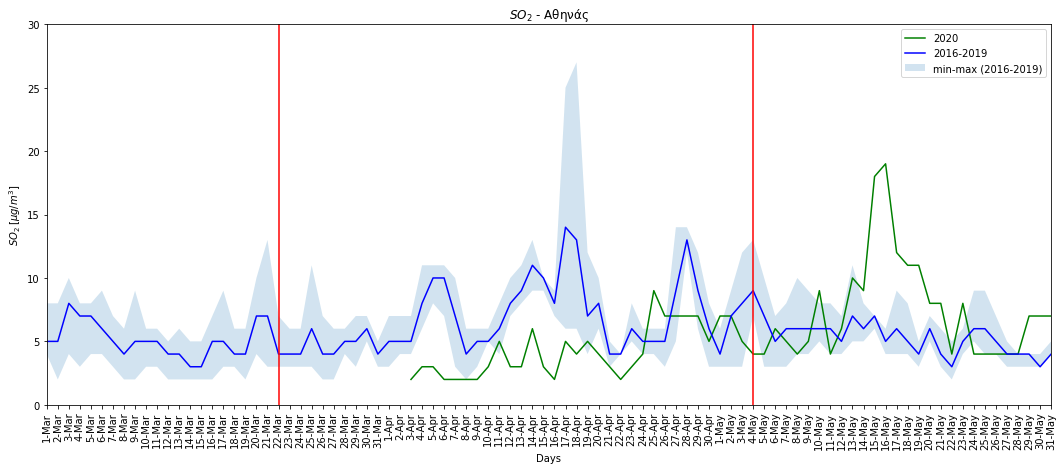

In [7]:
plt.figure(figsize=(18,7))
plt.title("$SO_{2}$ - Aθηνάς")

plt.xlabel('Days')
plt.ylabel('$SO_{2} \: [μg/m^{3}$]')

plt.title("$SO_{2}$ - Aθηνάς")

x=[]
for i in df['SO220']:
  if i==0:
    x+=[None]
  else:
    x+=[i]

plt.plot(df['DAY'], x, 'g', label='2020')
plt.plot(df['DAY'], df['SO2MEAN'], 'b', label='2016-2019')
plt.fill_between(df['DAY'], df['SO2MIN'], df['SO2MAX'], alpha=0.2, label='min-max (2016-2019)')
plt.legend()


plt.xlim(df.loc[0]['DAY'] , df.loc[91]['DAY'])
plt.ylim(0,30)

plt.axvline(x='4-May' ,color='r')
plt.axvline(x='22-Mar' ,color='r')
plt.xticks(rotation=90)

plt.show()

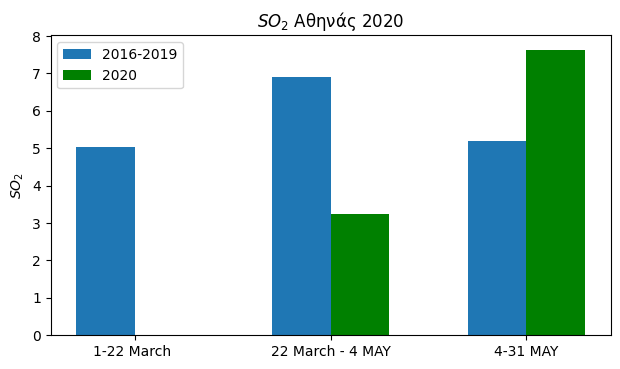

2020
Percentage Difference Pre-Lockdown to Lockdown = 200.00 % 
Percentage Difference Lockdown to Post-Lockdown = 80.47 % 

2016-2019
Percentage Difference Pre-Lockdown to Lockdown = 31.19 % 
Percentage Difference Lockdown to Post-Lockdown = 28.20 % 


In [8]:
Data=np.array(df['SO220'])
Pre=Data[0:23]
Lock=Data[23:66]
Post=Data[66:91]

Postnew=[]
for c in Post:
  if c!=0:
    Postnew+=[c]

Data=np.array(df['SO2MEAN'])
Pre1=Data[0:23]
Lock1=Data[23:66]
Post1=Data[66:91]


Prev = (np.mean(Pre1),np.mean(Lock1),np.mean(Post1))        # Set of A data
LOCK=   (np.mean(Pre),np.mean(Lock),np.mean(Postnew))    # Set of B data

names= ['1-22 March ', '22 March - 4 MAY', '4-31 MAY']     # Set of names for x asis 

fig = plt.figure(figsize=(7,5), dpi=100)
left, bottom, width, height = 0.1, 0.2, 0.8, 0.6
ax = fig.add_axes([left, bottom, width, height]) 
 
width = 0.3
ticks = np.arange(len(names))    
ax.bar(ticks, Prev, width, label='2016-2019')
ax.bar(ticks + width, LOCK, width, align="center", label='2020', color='green')



ax.set_ylabel('$SO_{2}$')
ax.set_title('$SO_{2}$ Aθηνάς 2020')
ax.set_xticks(ticks + width/2)
ax.set_xticklabels(names)

ax.legend(loc='best')
plt.show()


print('2020')
P1=perc(np.mean(Pre), np.mean(Lock))
P2=perc(np.mean(Lock),np.mean(Postnew))
print('Percentage Difference Pre-Lockdown to Lockdown = %.2f %% ' %(P1))
print('Percentage Difference Lockdown to Post-Lockdown = %.2f %% ' %(P2))


print()
print('2016-2019')
P11=perc(np.mean(Pre1), np.mean(Lock1))
P22=perc(np.mean(Lock1),np.mean(Post1))
print('Percentage Difference Pre-Lockdown to Lockdown = %.2f %% ' %(P11))
print('Percentage Difference Lockdown to Post-Lockdown = %.2f %% ' %(P22))

## **NO**

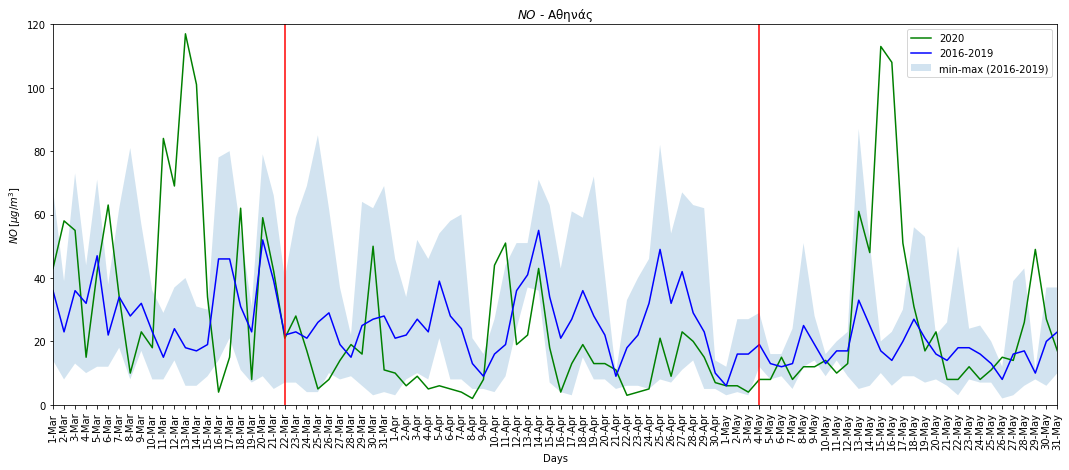

In [12]:
plt.figure(figsize=(18,7))
plt.title("$NO$ - Aθηνάς")

plt.xlabel('Days')
plt.ylabel('$NO \: [μg/m^{3}$]')

plt.title("$NO$ - Aθηνάς")


plt.plot(df['DAY'], df['N020'], 'g', label='2020')
plt.plot(df['DAY'], df['NOMEAN'], 'b', label='2016-2019')
plt.fill_between(df['DAY'], df['NOMIN'], df['NOMAX'], alpha=0.2 ,label='min-max (2016-2019)')
plt.legend()

plt.xlim(df.loc[0]['DAY'] , df.loc[91]['DAY'])
plt.ylim(0,120)

plt.axvline(x='4-May' ,color='r')
plt.axvline(x='22-Mar' ,color='r')
plt.xticks(rotation=90)

plt.show()

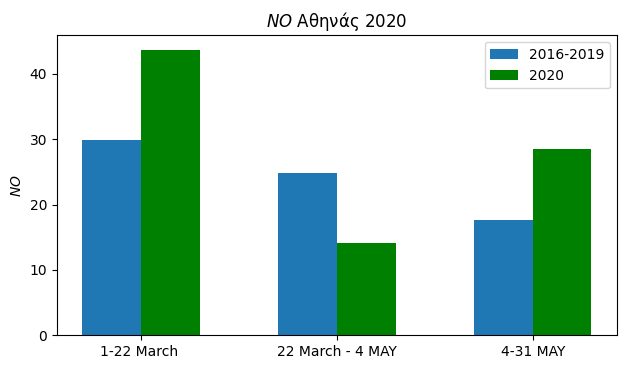

2020
Percentage Difference Pre-Lockdown to Lockdown = 102.69 % 
Percentage Difference Lockdown to Post-Lockdown = 68.13 % 

2016-2019
Percentage Difference Pre-Lockdown to Lockdown = 18.63 % 
Percentage Difference Lockdown to Post-Lockdown = 34.24 % 


In [19]:
Data=np.array(df['N020'])
Pre=Data[0:23]
Lock=Data[23:66]
Post=Data[66:91]

Data=np.array(df['NOMEAN'])
Pre1=Data[0:23]
Lock1=Data[23:66]
Post1=Data[66:91]

Prev = (np.mean(Pre1),np.mean(Lock1),np.mean(Post1))        # Set of A data
LOCK=   (np.mean(Pre),np.mean(Lock),np.mean(Post))    # Set of B data

names= ['1-22 March ', '22 March - 4 MAY', '4-31 MAY']     # Set of names for x asis 

fig = plt.figure(figsize=(7,5), dpi=100)
left, bottom, width, height = 0.1, 0.2, 0.8, 0.6
ax = fig.add_axes([left, bottom, width, height]) 
 
width = 0.3
ticks = np.arange(len(names))    
ax.bar(ticks, Prev, width, label='2016-2019')
ax.bar(ticks + width, LOCK, width, align="center", label='2020', color='green')


ax.set_ylabel('$NO$')
ax.set_title('$NO$ Aθηνάς 2020')
ax.set_xticks(ticks + width/2)
ax.set_xticklabels(names)

ax.legend(loc='best')
plt.show()

print('2020')
P1=perc(np.mean(Pre), np.mean(Lock))
P2=perc(np.mean(Lock),np.mean(Post))
print('Percentage Difference Pre-Lockdown to Lockdown = %.2f %% ' %(P1))
print('Percentage Difference Lockdown to Post-Lockdown = %.2f %% ' %(P2))

print()
print('2016-2019')
P11=perc(np.mean(Pre1), np.mean(Lock1))
P22=perc(np.mean(Lock1),np.mean(Post1))
print('Percentage Difference Pre-Lockdown to Lockdown = %.2f %% ' %(P11))
print('Percentage Difference Lockdown to Post-Lockdown = %.2f %% ' %(P22))

## **$NO_{2}$**

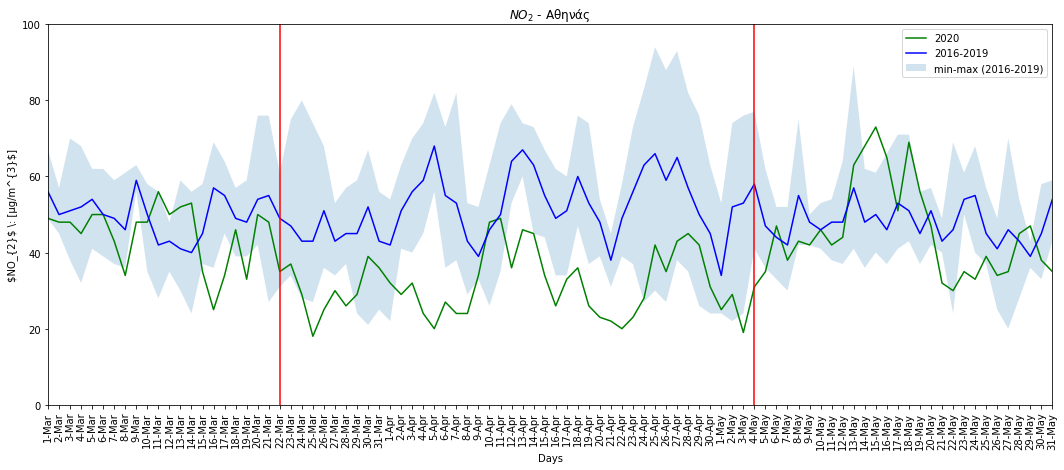

In [21]:
plt.figure(figsize=(18,7))
plt.title("$NO_{2}$ - Aθηνάς")

plt.xlabel('Days')
plt.ylabel('$NO_{2}$ \: [μg/m^{3}$]')

plt.title("$NO_{2}$ - Aθηνάς")

plt.plot(df['DAY'], df['N0220'], 'g', label='2020')
plt.plot(df['DAY'], df['NO2MEAN'], 'b', label='2016-2019')
plt.fill_between(df['DAY'], df['NO2MIN'], df['NO2MAX'], alpha=0.2, label='min-max (2016-2019)')

plt.legend()

plt.xlim(df.loc[0]['DAY'] , df.loc[91]['DAY'])
plt.ylim(0,100)

plt.axvline(x='4-May' ,color='r')
plt.axvline(x='22-Mar' ,color='r')
plt.xticks(rotation=90)

plt.show()

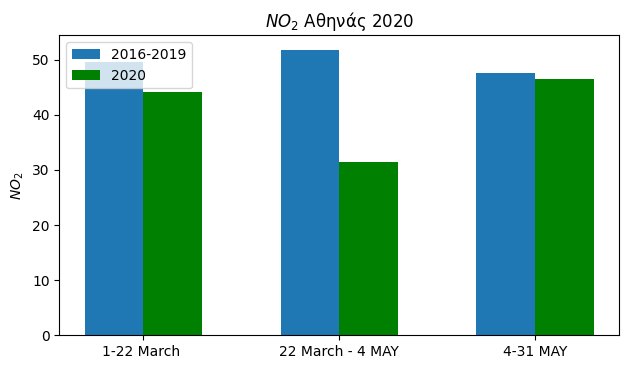

2020
Percentage Difference Pre-Lockdown to Lockdown = 33.92 % 
Percentage Difference Lockdown to Post-Lockdown = 38.74 % 

2016-2019
Percentage Difference Pre-Lockdown to Lockdown = 4.31 % 
Percentage Difference Lockdown to Post-Lockdown = 8.61 % 


In [24]:
Data=np.array(df['N0220'])
Pre=Data[0:23]
Lock=Data[23:66]
Post=Data[66:91]

Data=np.array(df['NO2MEAN'])
Pre1=Data[0:23]
Lock1=Data[23:66]
Post1=Data[66:91]

Prev = (np.mean(Pre1),np.mean(Lock1),np.mean(Post1))        # Set of A data
LOCK=   (np.mean(Pre),np.mean(Lock),np.mean(Post))    # Set of B data

names= ['1-22 March ', '22 March - 4 MAY', '4-31 MAY']     # Set of names for x asis 

fig = plt.figure(figsize=(7,5), dpi=100)
left, bottom, width, height = 0.1, 0.2, 0.8, 0.6
ax = fig.add_axes([left, bottom, width, height]) 
 
width = 0.3
ticks = np.arange(len(names))    
ax.bar(ticks, Prev, width, label='2016-2019')
ax.bar(ticks + width, LOCK, width, align="center", label='2020', color='green')

ax.set_ylabel('$NO_{2}$')
ax.set_title('$NO_{2}$ Aθηνάς 2020')
ax.set_xticks(ticks + width/2)
ax.set_xticklabels(names)

ax.legend(loc='best')
plt.show()


print('2020')
P1=perc(np.mean(Pre), np.mean(Lock))
P2=perc(np.mean(Lock),np.mean(Post))
print('Percentage Difference Pre-Lockdown to Lockdown = %.2f %% ' %(P1))
print('Percentage Difference Lockdown to Post-Lockdown = %.2f %% ' %(P2))

print()
print('2016-2019')
P11=perc(np.mean(Pre1), np.mean(Lock1))
P22=perc(np.mean(Lock1),np.mean(Post1))
print('Percentage Difference Pre-Lockdown to Lockdown = %.2f %% ' %(P11))
print('Percentage Difference Lockdown to Post-Lockdown = %.2f %% ' %(P22))

## **$PM_{10}$**

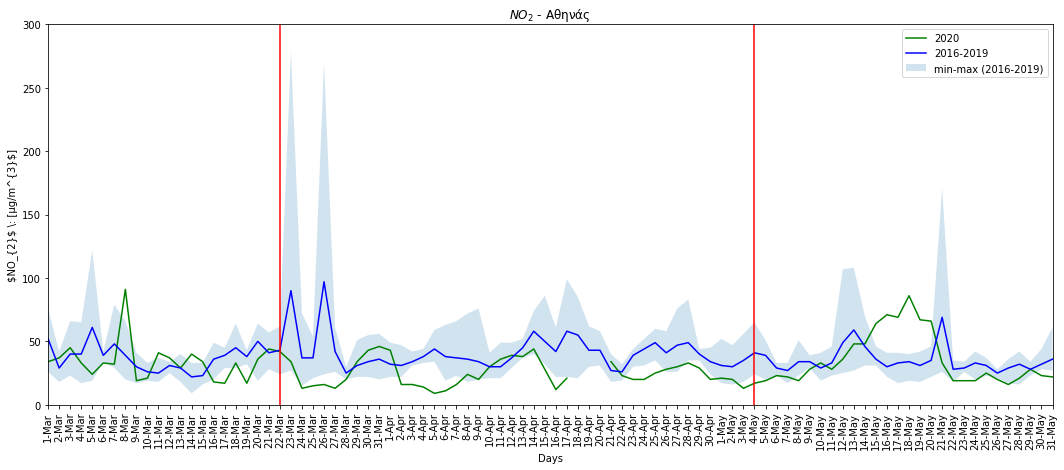

In [31]:
plt.figure(figsize=(18,7))
plt.title("$NO_{2}$ - Aθηνάς")

plt.xlabel('Days')
plt.ylabel('$NO_{2}$ \: [μg/m^{3}$]')

plt.title("$NO_{2}$ - Aθηνάς")

x=[]
for i in df['PM2020']:
  if i==0:
    x+=[None]
  else:
    x+=[i]

plt.plot(df['DAY'], x, 'g', label='2020')
plt.plot(df['DAY'], df['PM10MEAN'], 'b', label='2016-2019')
plt.fill_between(df['DAY'], df['PM10MIN'], df['PM10MAX'], alpha=0.2, label='min-max (2016-2019)')

plt.legend()

plt.xlim(df.loc[0]['DAY'] , df.loc[91]['DAY'])
plt.ylim(0,300)

plt.axvline(x='4-May' ,color='r')
plt.axvline(x='22-Mar' ,color='r')
plt.xticks(rotation=90)

plt.show()